In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

1. In markdown, describe KNN in your own words.

KNN a supervised learning algorithm, stands for k-Nearest Neighbours. It is the algorithm that is used to predict what group a datapoint belongs to based on the following idea--similar things exist in close proximity. The K is what indicates the amount of datapoints you want the a unknown datapoint to listen to in order to see what group it could belong to. KNN is considered to be the first step in machine learning.

2. Using the KNN example from class, write a function that finds the optimal value for k. You should iterate over a range of values and return the k and the score when the accuracy score is maximized. Be sure to only use odd values.

In [33]:
diabetes_df = pd.read_csv("diabetes copy.csv")
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [47]:
X = diabetes_df.drop('Outcome',axis=1)
y = diabetes_df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Standardization-transforming values so mean is 0 and SD is 1
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [45]:
from sklearn.preprocessing import StandardScaler

def optimal_k (x):
    for a in range(1, 100, 2):
        knn=KNeighborsClassifier(n_neighbors= a)
        knn.fit(X_train, y_train)
        y_predict = knn.predict(X_test)
        print(knn.score(X_test,y_test))

In [46]:
optimal_k(knn)


0.6277056277056277
0.70995670995671
0.7186147186147186
0.7056277056277056
0.70995670995671
0.7142857142857143
0.7142857142857143
0.7229437229437229
0.70995670995671
0.7359307359307359
0.7402597402597403
0.7402597402597403
0.7445887445887446
0.7359307359307359
0.7272727272727273
0.7316017316017316
0.7359307359307359
0.7402597402597403
0.7575757575757576
0.7619047619047619
0.7402597402597403
0.7445887445887446
0.7445887445887446
0.7316017316017316
0.7272727272727273
0.7229437229437229
0.7316017316017316
0.7316017316017316
0.7359307359307359
0.7445887445887446
0.7445887445887446
0.7445887445887446
0.7445887445887446
0.7359307359307359
0.7402597402597403
0.7402597402597403
0.7316017316017316
0.7272727272727273
0.7272727272727273
0.7272727272727273
0.7272727272727273
0.7359307359307359
0.7359307359307359
0.7359307359307359
0.7359307359307359
0.7402597402597403
0.7445887445887446
0.7489177489177489
0.7402597402597403
0.7316017316017316


In [48]:
knn=KNeighborsClassifier(n_neighbors= 39)
knn.fit(X_train, y_train)
y_predict = knn.predict(X_test)
print(knn.score(X_test,y_test))

0.7619047619047619


In [49]:
diabetes_pred_df = pd.DataFrame(X_test, columns = diabetes_df.columns[0:8])
diabetes_pred_df['Actual_Outcome'] = y_test.tolist()
diabetes_pred_df['Predicted_Outcome'] = y_predict.tolist()

diabetes_pred_df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Actual_Outcome,Predicted_Outcome
0,0.523387,-0.739446,-0.444600,0.720042,0.956067,0.232733,-0.152282,0.786051,0,0
1,-0.590921,-0.289349,0.329998,0.661122,-0.691043,0.433777,-1.077306,-1.059081,0,0
2,-0.590921,-0.417948,-0.171213,-1.224301,-0.691043,-0.145702,-1.044503,-1.059081,0,0
3,1.080541,-0.450098,0.557822,-1.224301,-0.691043,-0.878919,1.245094,0.031224,0,0
4,0.801964,0.482248,1.013468,-1.224301,-0.691043,-0.252136,-0.873932,1.373138,0,0
5,0.523387,-0.578697,0.193304,0.661122,0.956067,0.670299,-0.499986,1.792486,0,0
6,-0.869498,-1.607492,-0.900247,-0.163750,-0.032199,-1.375615,-0.503266,-0.975211,0,0
7,-1.148075,-0.128599,-3.087349,-1.224301,-0.691043,0.209081,1.494391,0.869920,0,0
8,-0.033767,1.060945,0.193304,0.484364,0.401251,-0.086571,-0.454063,0.282833,0,0
9,0.244810,0.835896,0.466692,-1.224301,-0.691043,0.197255,-0.847690,2.631182,0,1


In [50]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
confusion_matrix(y_test, y_predict)

array([[137,  14],
       [ 41,  39]])

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


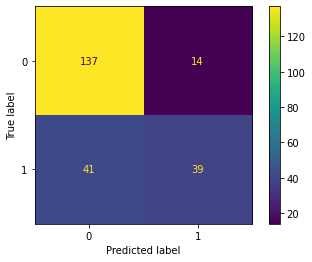

In [51]:
plot_confusion_matrix(knn, X_test, y_test)

3. How did the panel influence your thoughts about working in tech, specifically work in the data realm? Discuss with your group and summarize your thoughts in under 250 words.

We really liked how Michelle talked about the idea of working backwards when troubleshooting code and how the most useful function when this happens is print. I actually see myself doing a little bit of that too sometimes and it was comforting to hear that even people with ample experience approach errors in a similar way. We also discussed the assets we bring into the data science realm and how they can be a advantage to us. For example, I believe I have good differentiation and modeling skills as a teacher which can help in presenting data in a comprehendable way. 